In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
#import tensorflow_hub as hub
from matplotlib import pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pickle

## making labels and creating filenames in array

In [39]:
labels_csv = pd.read_csv("crnAndName.csv")
print(labels_csv.describe())
print(labels_csv.head())

                 CRN          Full Name
count             48                 48
unique            48                 48
top     KCE074BCT001  AAKASH RAJ DHAKAL
freq               1                  1
            CRN          Full Name
0  KCE074BCT001  AAKASH RAJ DHAKAL
1  KCE074BCT002    AAKASH SHRESTHA
2  KCE074BCT003     AAKRITI AGANJA
3  KCE074BCT004     AAYUSH MUSYAJU
4  KCE074BCT005      ABHINAV ARYAL


In [40]:
# convert labels column to NumPy array
unique_labels=labels_csv['CRN'].to_numpy()
unique_labels

array(['KCE074BCT001', 'KCE074BCT002', 'KCE074BCT003', 'KCE074BCT004',
       'KCE074BCT005', 'KCE074BCT006', 'KCE074BCT007', 'KCE074BCT008',
       'KCE074BCT009', 'KCE074BCT010', 'KCE074BCT011', 'KCE074BCT012',
       'KCE074BCT013', 'KCE074BCT014', 'KCE074BCT015', 'KCE074BCT016',
       'KCE074BCT017', 'KCE074BCT018', 'KCE074BCT019', 'KCE074BCT020',
       'KCE074BCT021', 'KCE074BCT022', 'KCE074BCT023', 'KCE074BCT024',
       'KCE074BCT025', 'KCE074BCT026', 'KCE074BCT027', 'KCE074BCT028',
       'KCE074BCT029', 'KCE074BCT030', 'KCE074BCT031', 'KCE074BCT032',
       'KCE074BCT033', 'KCE074BCT034', 'KCE074BCT035', 'KCE074BCT036',
       'KCE074BCT037', 'KCE074BCT038', 'KCE074BCT039', 'KCE074BCT040',
       'KCE074BCT041', 'KCE074BCT042', 'KCE074BCT043', 'KCE074BCT044',
       'KCE074BCT045', 'KCE074BCT046', 'KCE074BCT047', 'KCE074BCT048'],
      dtype=object)

In [41]:
import os
filedir=["data/"+crn for crn in unique_labels]
filedir[:5]

['data/KCE074BCT001',
 'data/KCE074BCT002',
 'data/KCE074BCT003',
 'data/KCE074BCT004',
 'data/KCE074BCT005']

In [42]:
filenames=[]
labels=[]
for dir in filedir:
    files=os.listdir(dir)
    for file in files:
        filetemp=dir+'/'+file
        filenames.append(filetemp)
        labels.append(dir[5:])

In [43]:
#checking files and labels available
print(len(filenames))
len((labels))

4700


4700

In [44]:
#checking labels and file name
print(filenames[:5])
print(labels[:5])

['data/KCE074BCT001/1.jpg', 'data/KCE074BCT001/1_B_0.125.jpg', 'data/KCE074BCT001/1_B_0.25.jpg', 'data/KCE074BCT001/1_B_0.375.jpg', 'data/KCE074BCT001/1_B_0.5.jpg']
['KCE074BCT001', 'KCE074BCT001', 'KCE074BCT001', 'KCE074BCT001', 'KCE074BCT001']


In [45]:
np_labels=np.asarray(labels)
print(np_labels)
type(np_labels)

['KCE074BCT001' 'KCE074BCT001' 'KCE074BCT001' ... 'KCE074BCT048'
 'KCE074BCT048' 'KCE074BCT048']


numpy.ndarray

In [46]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_labels # use comparison operator to create boolean array

KCE074BCT001


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [47]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_labels) for label in labels]
boolean_labels[-2:]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True])]

In [48]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_labels == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

KCE074BCT001
0
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


## creating validation list in small data

In [49]:
# Setup X & y variables
X = filenames
y = np_labels

In [50]:
# Set number of images to use for experimenting
NUM_IMAGES = 500 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

500

In [51]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                 random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(400, 400, 100, 100)

In [52]:
X_train[:5], y_train[:5]

(['data/KCE074BCT002/3_B_1.75.jpg',
  'data/KCE074BCT005/2_B_1.25.jpg',
  'data/KCE074BCT001/1_C_0.5.jpg',
  'data/KCE074BCT004/1_R_50.jpg',
  'data/KCE074BCT004/2_B_0.375.jpg'],
 array(['KCE074BCT002', 'KCE074BCT005', 'KCE074BCT001', 'KCE074BCT004',
        'KCE074BCT004'], dtype='<U12'))

## Preprocessing images (turning images into Tensors)

In [53]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[0]) # read in an image
image.shape

(205, 176, 3)

In [54]:
#tf.constant convert list into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 176, 3), dtype=uint8, numpy=
array([[[173, 140, 123],
        [195, 159, 143],
        [198, 159, 144],
        ...,
        [ 69,  45,  43],
        [ 54,  29,  25],
        [ 41,  16,  12]],

       [[171, 135, 119],
        [177, 140, 124],
        [183, 144, 127],
        ...,
        [ 70,  46,  44],
        [ 69,  45,  41],
        [ 59,  34,  30]]], dtype=uint8)>

In [55]:
# Define image size
IMG_SIZE = 160

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Creating data batches

In [56]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [57]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))# filenames                                                 
        data = data.shuffle(buffer_size=len(x))
# Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [58]:
# Create training and validation data batches
train_data = create_data_batches(X_train,test_data=True)
val_data = create_data_batches(X_val,test_data=True)

Creating test data batches...
Creating test data batches...


In [59]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None))

## Visualizing data batches

In [60]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis("off")

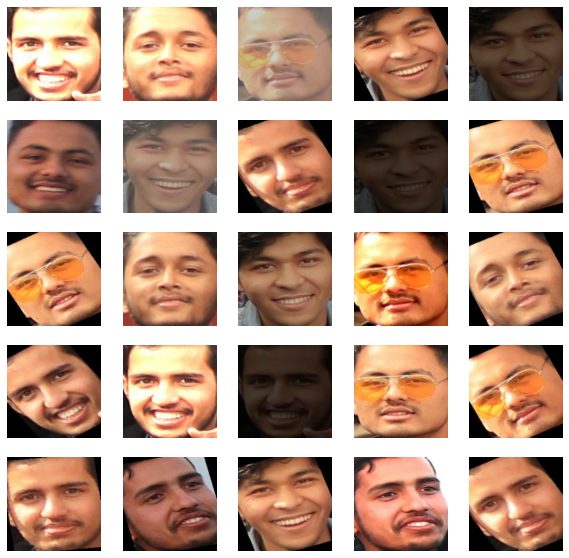

In [61]:
# Visualize training images from the training data batch
train_images = next(train_data.as_numpy_iterator())
show_25_images(train_images)

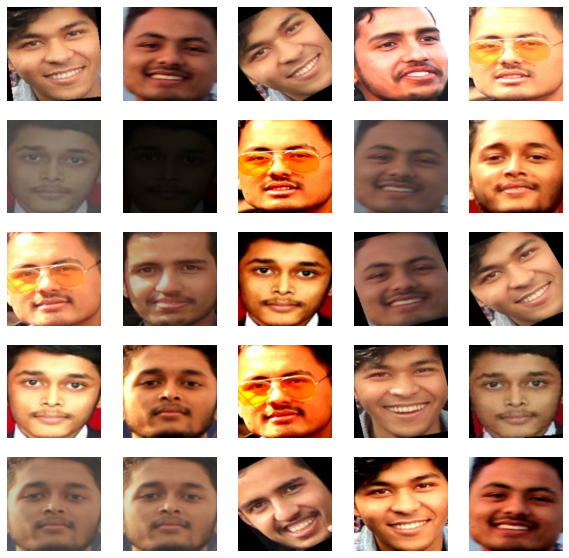

In [62]:
# Visualize validation images from the validation data batch
val_images=next(val_data.as_numpy_iterator())
show_25_images(val_images)

## Building a model

In [63]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

In [64]:
INPUT_SHAPE

[None, 160, 160, 3]

In [65]:
#find embeddings
model = load_model('model/facenet_keras.h5')
X_train_emb = model.predict(train_data)
X_val_emb = model.predict(val_data)

In [66]:
# we have embedding of 800 images
X_train_emb.shape,type(X_train_emb

((400, 128), numpy.ndarray)

In [69]:
X_val_emb.shape

(100, 128)

In [70]:
X_train_emb

array([[ 2.1008408 ,  0.28430116, -0.85336864, ...,  2.2236671 ,
        -1.7768552 , -0.17525773],
       [ 1.3571699 ,  0.7007241 , -1.0445621 , ..., -1.1105609 ,
         0.54970366, -1.8366573 ],
       [-0.71562934, -0.15542656,  1.1366674 , ..., -0.73057044,
        -0.0095722 ,  1.0221221 ],
       ...,
       [ 0.74970686,  0.69141316, -1.0303682 , ..., -1.1297039 ,
         0.5680812 , -0.29004318],
       [ 1.1606534 ,  0.6037433 , -1.2772365 , ..., -0.8889854 ,
         0.3149119 , -1.5303124 ],
       [-0.7101233 , -0.0794994 ,  1.3654355 , ..., -0.14589366,
        -0.71568674,  0.13996154]], dtype=float32)

In [71]:
X_val_emb

array([[ 0.03741372,  0.04085201, -0.23057021, ..., -0.29072022,
         1.1223576 , -0.4366416 ],
       [ 0.02270609,  0.07976848,  0.30488685, ..., -0.37096602,
         0.26058355, -0.40856156],
       [ 0.2993487 ,  1.070016  , -1.276849  , ..., -0.3957988 ,
         0.37059718, -0.6343479 ],
       ...,
       [ 0.03267779,  0.1278548 ,  0.38468087, ..., -0.30059844,
         0.20844756, -0.40156764],
       [ 1.3302156 ,  1.0148757 , -0.5658897 , ..., -1.5984148 ,
        -0.7565142 , -1.5123554 ],
       [-0.4263462 ,  0.5128206 ,  1.1570915 , ...,  0.04795506,
        -0.54764825,  0.28670946]], dtype=float32)

## now svc 

In [72]:
#normalize the embedded data
in_encode = Normalizer(norm='l2')
X_train_emb_nom = in_encode.transform(X_train_emb)
X_val_emb_nom = in_encode.transform(X_val_emb)

In [94]:
X_train_emb_nom,X_train_emb_nom.shape,type(X_train_emb_nom)

(array([[ 0.17111495,  0.02315653, -0.06950747, ...,  0.18111923,
         -0.1447261 , -0.01427486],
        [ 0.11354361,  0.05862402, -0.08739021, ..., -0.0929118 ,
          0.04598934, -0.15365852],
        [-0.06427871, -0.0139606 ,  0.10209686, ..., -0.06562074,
         -0.00085979,  0.09180827],
        ...,
        [ 0.0592845 ,  0.05467481, -0.08147833, ..., -0.08933348,
          0.0449221 , -0.02293572],
        [ 0.09393521,  0.04886278, -0.10337063, ..., -0.07194829,
          0.02548678, -0.12385283],
        [-0.05771888, -0.00646172,  0.11098271, ..., -0.01185825,
         -0.05817108,  0.01137609]], dtype=float32),
 (400, 128),
 numpy.ndarray)

In [74]:
y_train

array(['KCE074BCT002', 'KCE074BCT005', 'KCE074BCT001', 'KCE074BCT004',
       'KCE074BCT004', 'KCE074BCT001', 'KCE074BCT004', 'KCE074BCT002',
       'KCE074BCT004', 'KCE074BCT001', 'KCE074BCT001', 'KCE074BCT005',
       'KCE074BCT004', 'KCE074BCT001', 'KCE074BCT005', 'KCE074BCT002',
       'KCE074BCT002', 'KCE074BCT002', 'KCE074BCT001', 'KCE074BCT001',
       'KCE074BCT002', 'KCE074BCT002', 'KCE074BCT004', 'KCE074BCT002',
       'KCE074BCT002', 'KCE074BCT002', 'KCE074BCT005', 'KCE074BCT002',
       'KCE074BCT001', 'KCE074BCT004', 'KCE074BCT001', 'KCE074BCT001',
       'KCE074BCT005', 'KCE074BCT002', 'KCE074BCT001', 'KCE074BCT001',
       'KCE074BCT002', 'KCE074BCT001', 'KCE074BCT001', 'KCE074BCT002',
       'KCE074BCT001', 'KCE074BCT002', 'KCE074BCT005', 'KCE074BCT001',
       'KCE074BCT002', 'KCE074BCT002', 'KCE074BCT001', 'KCE074BCT002',
       'KCE074BCT002', 'KCE074BCT005', 'KCE074BCT001', 'KCE074BCT001',
       'KCE074BCT001', 'KCE074BCT001', 'KCE074BCT005', 'KCE074BCT004',
      

In [75]:
#define svm classifier model 
model_svc =SVC(kernel='poly',degree=5, probability=True)
model_svc.fit(X_train_emb_nom,y_train)

SVC(degree=5, kernel='poly', probability=True)

In [76]:
model_svc.score(X_train_emb_nom,y_train)

0.9625

In [77]:
model_svc.score(X_val_emb_nom,y_val)

0.97

In [78]:
y_preds=model_svc.predict(X_val_emb_nom)

In [79]:
np.mean(y_preds==y_val)

0.97

In [80]:
image=process_image('1.jpg')

In [92]:
image

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[0.70183855, 0.71360326, 0.6861523 ],
        [0.6674763 , 0.67139786, 0.65179   ],
        [0.6113467 , 0.61918986, 0.599582  ],
        ...,
        [0.16451114, 0.16058958, 0.15274644],
        [0.17692344, 0.17300187, 0.1573156 ],
        [0.18111473, 0.17620079, 0.16868845]],

       [[0.68150735, 0.6775858 , 0.65797794],
        [0.6525491 , 0.65647066, 0.6368628 ],
        [0.63924426, 0.6470874 , 0.62747955],
        ...,
        [0.15375824, 0.14983667, 0.14199354],
        [0.16745117, 0.1635296 , 0.14784333],
        [0.16839376, 0.16447219, 0.14878592]],

       [[0.690832  , 0.6790673 , 0.6594595 ],
        [0.6801388 , 0.67621726, 0.660531  ],
        [0.6371257 , 0.6332041 , 0.6175178 ],
        ...,
        [0.15446635, 0.15054478, 0.1348585 ],
        [0.15515567, 0.1512341 , 0.13554783],
        [0.15806097, 0.1541394 , 0.13845313]],

       ...,

       [[0.98823535, 0.9960785 , 0.98370105],
        [0.98

In [83]:
image_1=tf.expand_dims(image, axis=0)

In [85]:
image_data=model.predict(image_1)

In [86]:
image_data

array([[-0.01221037, -0.2621345 ,  0.13871783,  1.5715444 , -1.241446  ,
         1.721483  , -0.6799464 ,  0.48214573, -0.21701878,  1.6473107 ,
         1.5060097 , -1.2619948 ,  0.09369235,  0.82842696, -0.00761938,
         1.6971278 ,  0.7570815 ,  0.48479885, -0.10274448,  0.08281661,
         0.23924479,  0.18348496,  1.1950525 ,  0.02161993,  0.10468145,
         0.2958903 , -1.7029997 , -0.7165272 , -0.9006773 , -1.3769866 ,
         0.00554263, -0.7101448 , -0.72217506,  1.3039361 ,  3.6271079 ,
         1.2838402 ,  0.08447733,  0.41489235,  0.6506168 ,  0.8731133 ,
         1.1805024 ,  1.8266541 ,  2.5801425 , -0.1881537 , -0.71764827,
        -1.074965  ,  0.88123715,  0.91965973, -0.03896109,  2.4271538 ,
         0.1453241 ,  0.3360957 , -0.03027305,  0.31206852,  0.05749772,
         1.166785  ,  1.8741554 , -0.555868  ,  0.00800644, -1.0310308 ,
         1.4473459 ,  0.19531225,  0.74487156,  1.314632  ,  0.36132097,
        -0.82169545, -0.44681954,  0.7041321 , -1.3

In [87]:
in_encode = Normalizer(norm='l2')
image_nom = in_encode.transform(image_data)

In [91]:
model_svc.predict(image_nom)

array(['KCE074BCT002'], dtype='<U12')

In [45]:
import datetime
pickle.dump(model_svc,open("model/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+"_svc.pk","wb"))